# Imports and Settings

In [6]:
from matplotlib import pyplot as plt
import numpy as np
import math

In [7]:
N_TIME_SAMPLES = 500
N_FREQUENCY_CHANNELS = 128 # Must be power of 2


# Upper bound of the FRB
UPPER_BOUND = np.random.random()*N_FREQUENCY_CHANNELS

# Lower bound of the FRB
LOWER_BOUND = np.random.random()*UPPER_BOUND

# RFI intensitiy will be in range [0, RFI_STRENGTH)
RFI_STRENGTH = 7

# FRB intensity will be in range [FRB_MIN_STRENGTH, FRB_MAX_STRENGTH)
FRB_MAX_STRENGTH = 10
FRB_MIN_STRENGTH = 0

# Experimental
ADD_FRB_NOISE = True
FRB_NOISE_STRENGTH = 3

# Create Data
## Create the data with the background noise

In [8]:
data = np.random.random( (N_FREQUENCY_CHANNELS, N_TIME_SAMPLES) )*RFI_STRENGTH

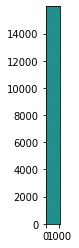

In [9]:
plt.imshow(data, origin="lower")
plt.show()

## Draw a line in the data

In [10]:
# Draws a line in the data given the lines slope and y incercept
def draw_line(data, m, b):
    f = lambda x: m*x + b

    # For every x value, fill in y values
    for x in range(N_TIME_SAMPLES):
        draw_back(data, m, b, x, f(x), x+1, f(x+1))
    
    return data

In [11]:
def draw_back(data, m, b, x0, y0, x1, y1):
    f_inv = lambda y: (y-b)/m

    # Modified Bresenham's line algorithm 
    while y0 <= y1 and f_inv(y1) < N_TIME_SAMPLES:
        err = x1 - f_inv(y0)-0.5
        val = np.random.random()*(FRB_MAX_STRENGTH-FRB_MIN_STRENGTH) + FRB_MIN_STRENGTH

        if err > 0 and y0 < UPPER_BOUND and y0 > LOWER_BOUND:
            data[int(y0)][x0] = val
        elif y0 < UPPER_BOUND and y0 > LOWER_BOUND:
            data[int(y0)][x1] = val

        if y0 < UPPER_BOUND and y0 > LOWER_BOUND and ADD_FRB_NOISE:
            amt = np.random.random() * FRB_NOISE_STRENGTH
            for i in range(int(-amt/2), int(amt/2)):
                data[int(y0)][x1-i] = np.random.random()*(FRB_MAX_STRENGTH-FRB_MIN_STRENGTH) + FRB_MIN_STRENGTH
        
        y0 += 1

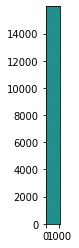

In [12]:
m = math.tan(np.random.random()*math.pi/4 + math.pi/4) # Choose a ranom slope in range [PI/4, PI/2)
x_intercept = np.random.random()*N_TIME_SAMPLES # Choose a random x intercept in range [0, N_SAMPLES)

b = -m*x_intercept # Calculate the y intercept

data = draw_line(data, m, b) # Draw the line

plt.imshow(data, origin="lower")
plt.show()

# FRB Detection

In [13]:
def emphasizeMax(data):
    n =  ( N_FREQUENCY_CHANNELS*FRB_MAX_STRENGTH )
    return np.array( 
        [
            [ 
                data[y][x]**3/n
            for x in range(N_TIME_SAMPLES) 
        ] for y in range(N_FREQUENCY_CHANNELS)] )


def line_detection(data):
    i = 1
    vert_sums = diag_sums = data

    while 2**i <= N_FREQUENCY_CHANNELS:
        N = int(N_FREQUENCY_CHANNELS/2**i)

        vert = vert_sums[0:N*2:2, 0:N_TIME_SAMPLES] + vert_sums[1:N*2+1:2, 0:N_TIME_SAMPLES]
        diag = diag_sums[0:N*2:2, 0:N_TIME_SAMPLES-1] + diag_sums[1:N*2+1:2, 1:N_TIME_SAMPLES]
            
        vert_sums[0:N, 0:N_TIME_SAMPLES] = vert
        diag_sums[0:N, 0:N_TIME_SAMPLES-1] = diag
        
        i += 1
    
    return diag_sums + vert_sums

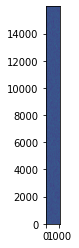

In [14]:
data = emphasizeMax(data)
plt.imshow(data, origin="lower")
plt.show()

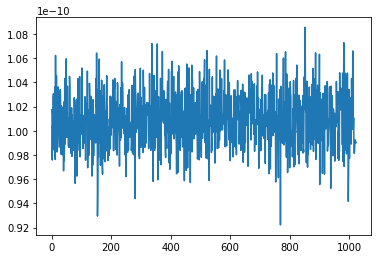

In [15]:
sums = line_detection(emphasizeMax(data))[0]
plt.plot(sums)
plt.show()